In [1]:
import pandas as pd
import sys
import os
sys.path.append("..")

data = pd.read_csv("../data/MSFT_historical_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9672 entries, 0 to 9671
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9672 non-null   object 
 1   Open          9672 non-null   float64
 2   High          9672 non-null   float64
 3   Low           9672 non-null   float64
 4   Close         9672 non-null   float64
 5   Adj Close     9672 non-null   float64
 6   Volume        9672 non-null   int64  
 7   Dividends     9672 non-null   float64
 8   Stock Splits  9672 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 680.2+ KB


In [2]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [3]:
# Function to handle missing values
def handle_missing_values(data):
    data = data.ffill()  
    return data

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9667,2024-07-24,440.450012,441.480011,427.589996,428.899994,428.128326,26805800,0.0,0.0
9668,2024-07-25,428.799988,429.799988,417.510010,418.399994,417.647217,29943800,0.0,0.0
9669,2024-07-26,418.200012,428.920013,417.269989,425.269989,424.504852,23583800,0.0,0.0
9670,2024-07-29,431.579987,432.149994,424.700012,426.730011,425.962250,15125800,0.0,0.0


In [4]:
def analyze_statistics(data, columns):
    print(f"Statistics for MSFT:")
    print(data[columns].describe())

analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

Statistics for MSFT:
              Open         High          Low    Adj Close        Close  \
count  9672.000000  9672.000000  9672.000000  9672.000000  9672.000000   
mean     58.402199    59.003071    57.784759    52.719365    58.417683   
std      90.122302    90.958645    89.232546    90.066461    90.146786   
min       0.088542     0.092014     0.088542     0.055665     0.090278   
25%       5.695313     5.770508     5.617188     3.511695     5.695313   
50%      27.304999    27.600000    27.085000    19.145540    27.341875   
75%      46.687500    47.099998    46.138672    38.339042    46.657187   
max     467.000000   468.350006   464.459991   466.718781   467.559998   

             Volume  
count  9.672000e+03  
mean   5.677678e+07  
std    3.814123e+07  
min    2.304000e+06  
25%    3.206982e+07  
50%    4.990225e+07  
75%    7.071788e+07  
max    1.031789e+09  


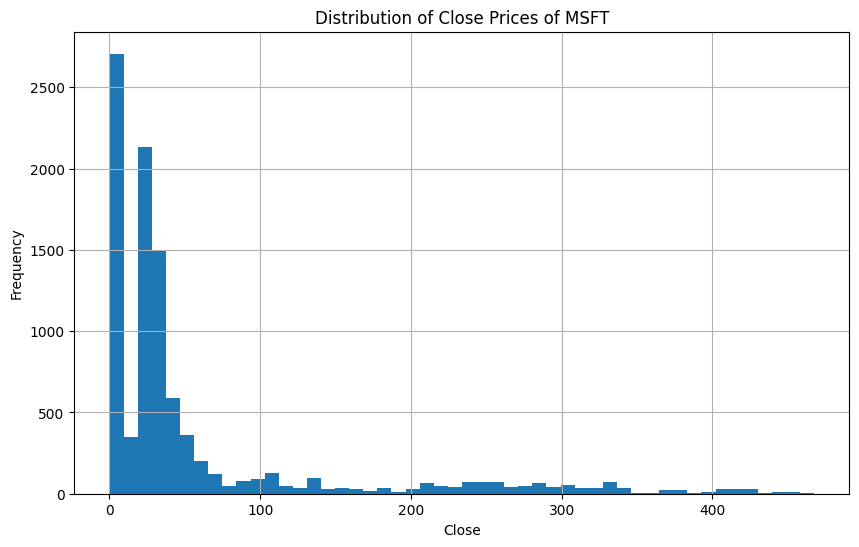

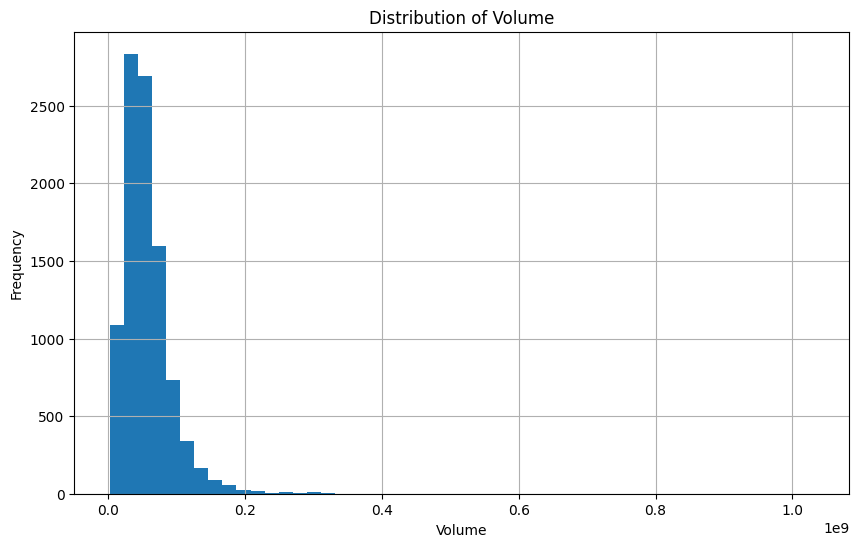

In [5]:
import matplotlib.pyplot as plt

def plot_distributions(data, column, bins=50, title="Distribution"):
    plt.figure(figsize=(10, 6))
    data[column].hist(bins=bins)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

plot_distributions(data, 'Close', title="Distribution of Close Prices of MSFT")
plot_distributions(data, 'Volume', title="Distribution of Volume")


Correlation Matrix for MSFT:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999946  0.999939   0.998835  0.999871 -0.345265
High       0.999946  1.000000  0.999923   0.998865  0.999936 -0.344280
Low        0.999939  0.999923  1.000000   0.998940  0.999944 -0.346409
Adj Close  0.998835  0.998865  0.998940   1.000000  0.998963 -0.345273
Close      0.999871  0.999936  0.999944   0.998963  1.000000 -0.345425
Volume    -0.345265 -0.344280 -0.346409  -0.345273 -0.345425  1.000000


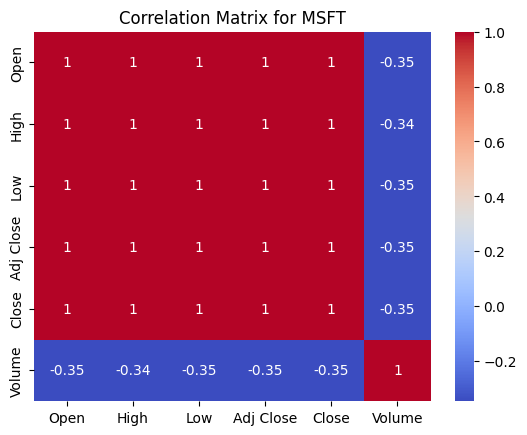

In [6]:
import seaborn as sns

def analyze_correlations(data, columns):
    correlation_matrix = data[columns].corr()
    print(f"\nCorrelation Matrix for MSFT:")
    print(correlation_matrix)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for MSFT")
    plt.show()
    
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

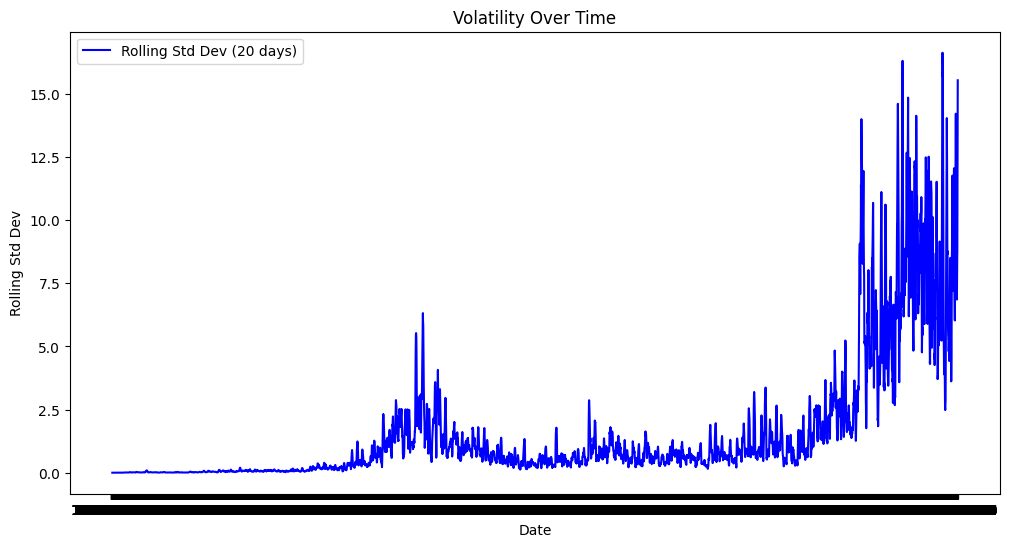

In [7]:
# Function to study volatility
def plot_volatility(data, value_col, date_col, window=20):
    data['Rolling_Std'] = data[value_col].rolling(window=window).std()
    plt.figure(figsize=(12, 6))
    plt.plot(data[date_col], data['Rolling_Std'], label=f"Rolling Std Dev ({window} days)", color='blue')
    plt.title("Volatility Over Time")
    plt.xlabel("Date")
    plt.ylabel("Rolling Std Dev")
    plt.legend()
    plt.show()

plot_volatility(data, 'Close', 'Date')

In [8]:
import pandas as pd
import talib as ta

import sys
import os
from IPython.display import display

# Load the stock data loader script
sys.path.append(os.path.abspath('./scripts'))
from scripts.load_stock_data import load_stock_data

# List of company names
company_names = ['MSFT']

# Dictionary to store stock data
stock_data = {}

# Load data for company
for company in company_names:
    stock_data[company] = load_stock_data(f'../data/{company}_historical_data.csv')

# Define your apply_technical_indicators function
def apply_technical_indicators(df):
    # Calculate Simple Moving Average (SMA)
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    
    # Calculate Relative Strength Index (RSI)
    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
    
    # Calculate Moving Average Convergence Divergence (MACD)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], 
                                                              fastperiod=12, 
                                                              slowperiod=26, 
                                                              signalperiod=9)
    return df

# Apply technical indicators to company's data
for company, data in stock_data.items():
    stock_data[company] = apply_technical_indicators(data)

# Display the first few rows of the data for company
for company, data in stock_data.items():
    print(f"--- {company} ---")
    display(data.head())

--- MSFT ---


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_signal,MACD_hist
Date,,,,,,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0,NaN,NaN,NaN,NaN,NaN


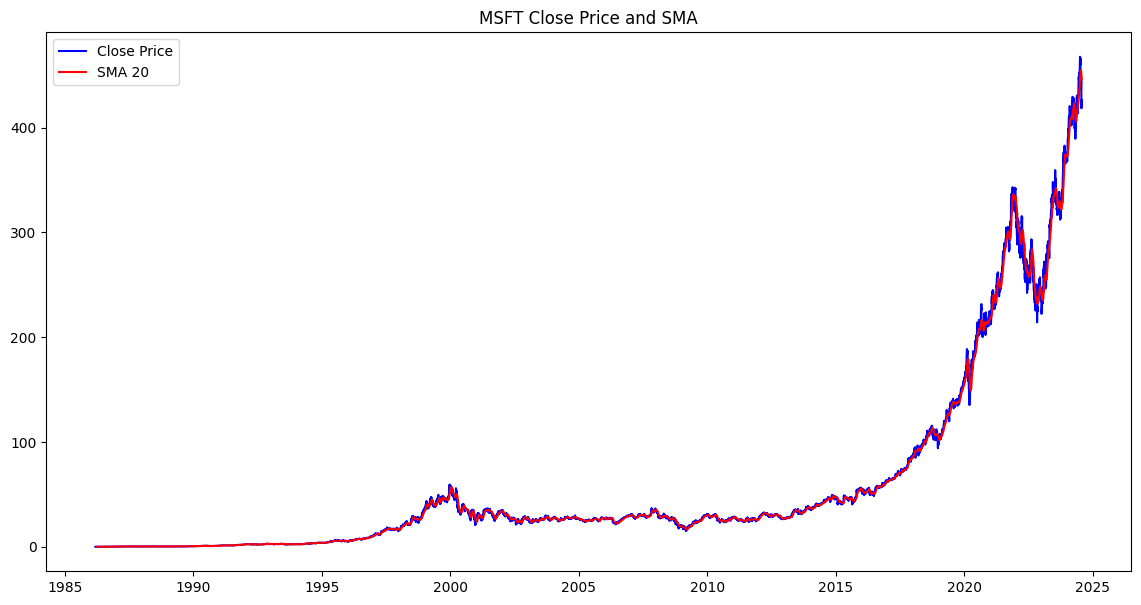

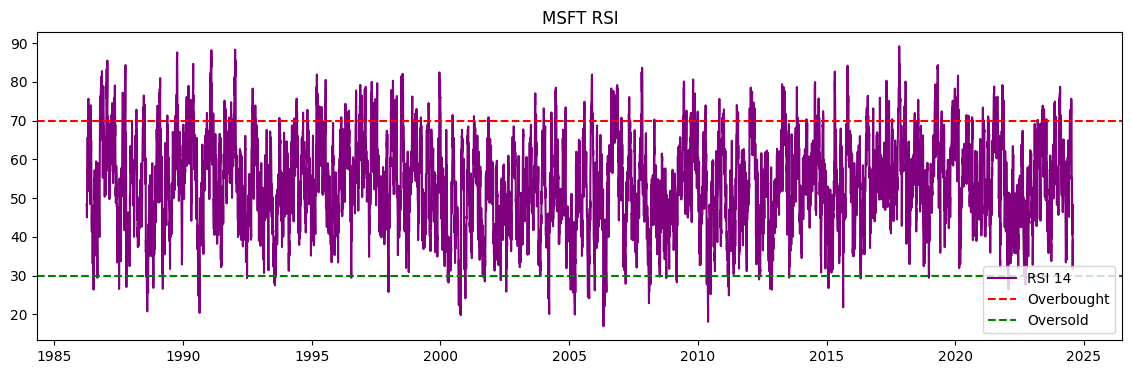

c:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


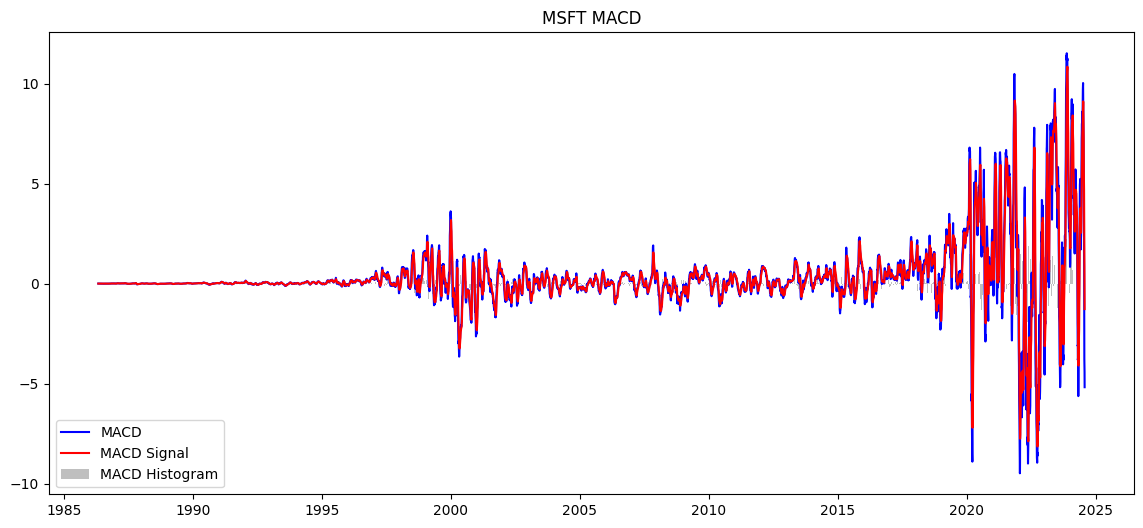

In [9]:
import matplotlib.pyplot as plt

# Choose a company to plot (e.g., 'AAPL')
company_to_plot = 'MSFT'
data = stock_data[company_to_plot]

# Plot Close Price and SMA
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_20'], label='SMA 20', color='red')
plt.title(f'{company_to_plot} Close Price and SMA')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 4))
plt.plot(data['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title(f'{company_to_plot} RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 6))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='red')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title(f'{company_to_plot} MACD')
plt.legend()
plt.show()

In [11]:
data['Daily_Return'] = data['Adj Close'].pct_change()
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

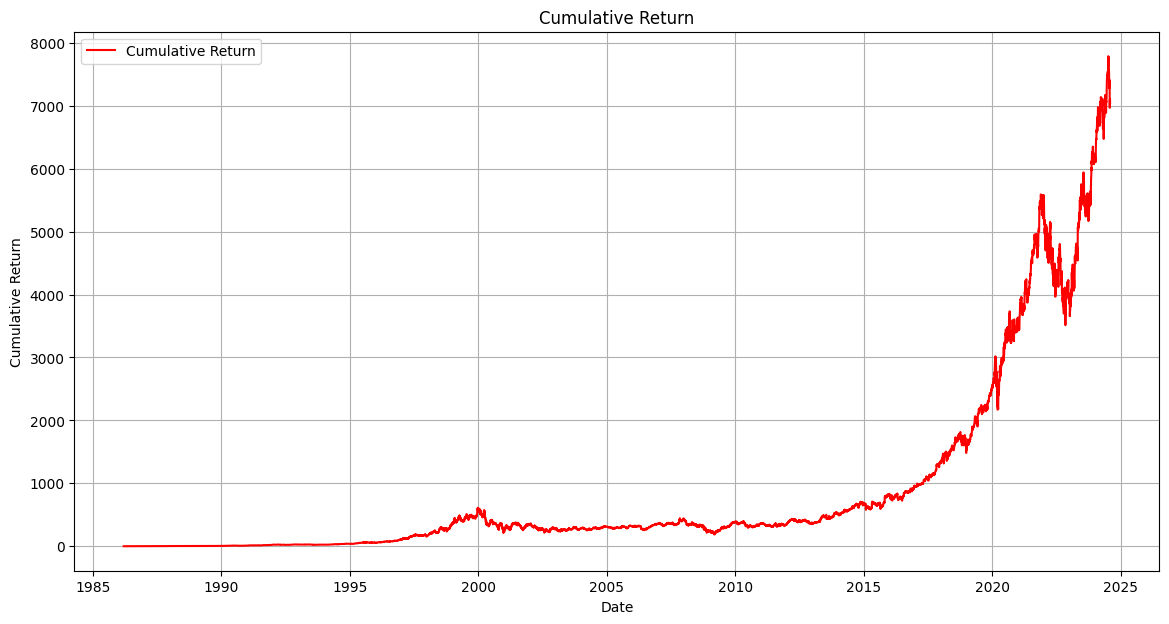

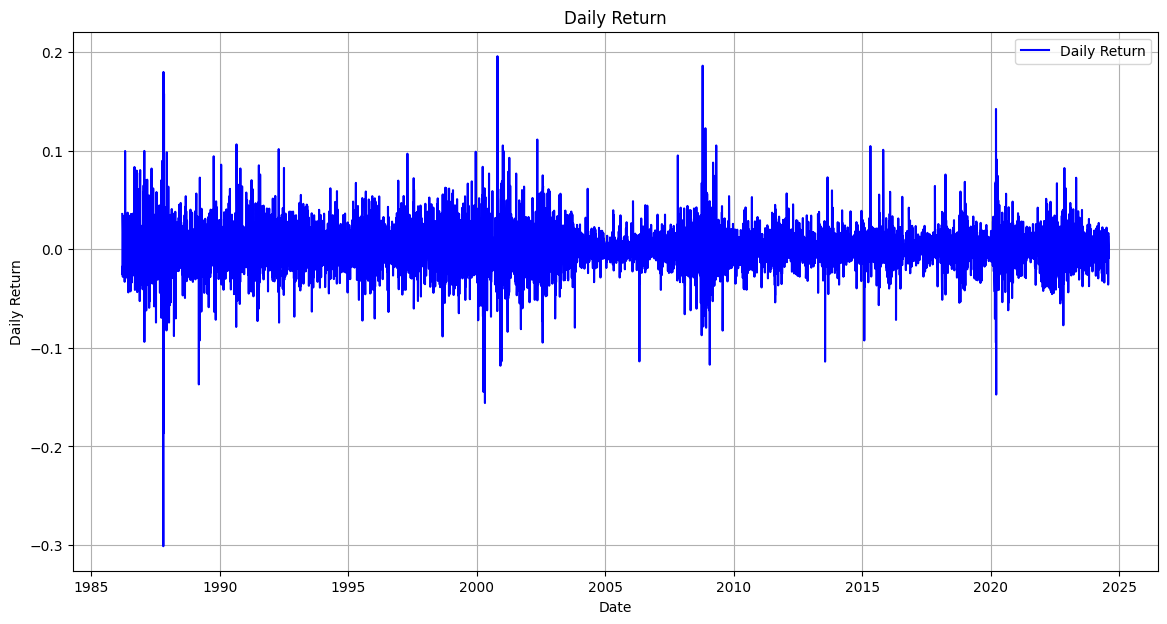

In [12]:
# Ensure 'Date' is a column and properly formatted
data.reset_index(inplace=True)  # Converts index to a column if 'Date' is in the index
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])  # Ensure it's in datetime format

# Define the plotting function
def plot_financial_metrics(data):
    """Plot daily returns and cumulative returns."""
    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Cumulative_Return'], label='Cumulative Return', color='red')
    plt.title('Cumulative Return')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.plot(data['Date'], data['Daily_Return'], label='Daily Return', color='blue')
    plt.title('Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.grid()
    plt.show()

# Call the function
plot_financial_metrics(data)